# Librerias

In [1]:
# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

# Manejo de archivos Pandas
import pandas as pd

# Manejo de matrices
import numpy as np

# División de los datos en entrenamiento y testing
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn import model_selection

# Metricas bonitas
from yellowbrick.classifier import confusion_matrix as  cm
from yellowbrick.classifier import classification_report as cr
from yellowbrick.classifier.rocauc import roc_auc
from yellowbrick.classifier import class_prediction_error

# Herramientas
## Encoder, paso de variables categóricas a numéricas
from sklearn.preprocessing import LabelEncoder
## Para preprocesar las features
from sklearn import preprocessing

#Balance de clases
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import KMeansSMOTE
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import SMOTEN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import ClusterCentroids
from imblearn.under_sampling import NearMiss

# Visualización y gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# PCA
from sklearn.decomposition import PCA

# Lectura del dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import sys
y=np.int8(-129)
x=233455656

<ipython-input-3-130462d4c205>:3: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -129 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  y=np.int8(-129)


In [4]:
x,type(x),sys.getsizeof(x)

(233455656, int, 28)

In [5]:
y,type(y),y.nbytes

(127, numpy.int8, 1)

In [6]:
help(sys.getsizeof)

Help on built-in function getsizeof in module sys:

getsizeof(...)
    getsizeof(object [, default]) -> int
    
    Return the size of object in bytes.



In [7]:
# Ruta donde se encuentran los datos en Drive
# Rei
path_datos = "/content/drive/MyDrive/!Autonoma/Machine Learning IPS-UAI-2023-02/Módulo 3 S3/Datos"


In [8]:
# Leer el dataset
df = pd.read_csv(path_datos+"/wisc_bc_data.csv")
df2 = pd.read_csv(path_datos+"/BDParkinson_Prediction.csv")

In [9]:
df2

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.000000,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.000000,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.000000,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.000000,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.000000,0.677162,0.209531,0.991066,Class_1
...,...,...,...,...,...,...,...
495,0.712586,0.219776,0.510939,0.593045,0.268087,0.092055,Class_4
496,0.686058,0.224004,0.518661,0.600564,0.253298,0.093827,Class_4
497,0.698661,0.216604,0.505791,0.591165,0.241696,0.090734,Class_4
498,0.714926,0.222613,0.562420,0.587406,0.271037,0.093245,Class_4


In [10]:
# Mostrar el dataframe
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df2

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.000000,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.000000,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.000000,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.000000,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.000000,0.677162,0.209531,0.991066,Class_1
...,...,...,...,...,...,...,...
495,0.712586,0.219776,0.510939,0.593045,0.268087,0.092055,Class_4
496,0.686058,0.224004,0.518661,0.600564,0.253298,0.093827,Class_4
497,0.698661,0.216604,0.505791,0.591165,0.241696,0.090734,Class_4
498,0.714926,0.222613,0.562420,0.587406,0.271037,0.093245,Class_4


In [12]:
# Mostrar todas las columnas del dataframe
pd.options.display.max_columns = None
# Mostrar el dataframe ya con todas las columnas
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# Mostrar nombres de las columnas
list(df.columns.values)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

# Eliminar columnas innecesarias del dataset

In [14]:
# Eliminar la columna de identificación, esta no se puede usar como feature
df = df.drop(['id'], axis=1)

# Mostramos el df sin la identificación
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Análisis exploratorio de datos (Exploratory data analysis - EDA)

In [15]:
# Cantidad de clases
print(f'Número de clases {len(df["diagnosis"].value_counts())}')

Número de clases 2


In [16]:
import numpy as np
x=np.int8(100)
y=np.int8(5)
v=np.array([1,2,3]).astype('float32')

In [17]:
x=np.uint8(-129)

<ipython-input-17-551c7dc16501>:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of -129 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  x=np.uint8(-129)


In [18]:
x,type(x),x.nbytes

(127, numpy.uint8, 1)

In [19]:
y=np.float64(2.1454534534543543534543)

In [20]:
y,type(y),y.nbytes

(2.1454534534543543, numpy.float64, 8)

In [21]:
v,type(v),v.nbytes

(array([1., 2., 3.], dtype=float32), numpy.ndarray, 12)

In [22]:
x+y

129.14545345345437

In [23]:
x,y,type(x),type(y)

(127, 2.1454534534543543, numpy.uint8, numpy.float64)

In [24]:
z=np.int8(128)

<ipython-input-24-84d65a6310fc>:1: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 128 to int8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  z=np.int8(128)


In [25]:
z

-128

In [26]:
from sys import getsizeof
y=123714367832657836758676

In [27]:
y,type(y)

(123714367832657836758676, int)

In [28]:
getsizeof(y)

36

In [29]:
help(getsizeof)

Help on built-in function getsizeof in module sys:

getsizeof(...)
    getsizeof(object [, default]) -> int
    
    Return the size of object in bytes.



In [30]:
x=np.float128(3.2534543535345435435345)

In [31]:
x,type(x),x.nbytes

(3.2534543535345434861, numpy.longdouble, 16)

In [32]:
x=df["diagnosis"]

In [33]:
x

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [34]:
x=pd.DataFrame.to_numpy(df)

In [35]:
x=np.float32(x[:,1:])

In [36]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], dtype=float32)

In [37]:
x[:,:]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], dtype=float32)

In [38]:
y=x[:,1]

In [39]:
y

array([10.38, 17.77, 21.25, 20.38, 14.34, 15.7 , 19.98, 20.83, 21.82,
       24.04, 23.24, 17.89, 24.8 , 23.95, 22.61, 27.54, 20.13, 20.68,
       22.15, 14.36, 15.71, 12.44, 14.26, 23.04, 21.38, 16.4 , 21.53,
       20.25, 25.27, 15.05, 25.11, 18.7 , 23.98, 26.47, 17.88, 21.59,
       21.72, 18.42, 25.2 , 20.82, 21.58, 21.35, 24.81, 20.28, 21.81,
       17.6 , 16.84, 18.66, 14.63, 22.3 , 21.6 , 16.34, 18.24, 18.7 ,
       22.02, 18.75, 18.57, 21.59, 19.31, 11.79, 14.88, 20.98, 22.15,
       13.86, 23.84, 23.94, 21.01, 19.04, 17.33, 16.49, 21.31, 14.64,
       24.52, 15.79, 16.52, 19.65, 10.94, 16.15, 23.97, 18.  , 20.97,
       15.86, 24.91, 26.29, 15.65, 18.52, 21.46, 24.59, 21.8 , 15.24,
       24.02, 22.76, 14.76, 18.3 , 19.83, 23.03, 17.84, 19.94, 12.84,
       19.77, 24.98, 13.43, 20.52, 19.4 , 19.29, 15.56, 18.33, 18.54,
       19.67, 21.26, 16.99, 20.76, 19.65, 20.19, 15.83, 21.53, 15.76,
       16.67, 22.91, 20.01, 10.82, 17.12, 20.2 , 10.89, 16.39, 17.21,
       24.69, 18.91,

In [40]:
y=np.float16(y)

In [41]:
y

array([10.38, 17.77, 21.25, 20.38, 14.34, 15.7 , 19.98, 20.83, 21.81,
       24.05, 23.23, 17.89, 24.8 , 23.95, 22.61, 27.55, 20.12, 20.69,
       22.16, 14.36, 15.71, 12.44, 14.26, 23.05, 21.38, 16.4 , 21.53,
       20.25, 25.27, 15.05, 25.11, 18.7 , 23.98, 26.47, 17.88, 21.6 ,
       21.72, 18.42, 25.2 , 20.81, 21.58, 21.34, 24.81, 20.28, 21.81,
       17.6 , 16.84, 18.66, 14.63, 22.3 , 21.6 , 16.34, 18.23, 18.7 ,
       22.02, 18.75, 18.56, 21.6 , 19.31, 11.79, 14.88, 20.98, 22.16,
       13.86, 23.84, 23.94, 21.02, 19.05, 17.33, 16.48, 21.31, 14.64,
       24.52, 15.79, 16.52, 19.66, 10.94, 16.16, 23.97, 18.  , 20.97,
       15.86, 24.9 , 26.3 , 15.65, 18.52, 21.45, 24.6 , 21.8 , 15.24,
       24.02, 22.77, 14.76, 18.3 , 19.83, 23.03, 17.84, 19.94, 12.84,
       19.77, 24.98, 13.43, 20.52, 19.4 , 19.3 , 15.56, 18.33, 18.55,
       19.67, 21.27, 16.98, 20.77, 19.66, 20.19, 15.83, 21.53, 15.76,
       16.67, 22.9 , 20.02, 10.82, 17.12, 20.2 , 10.89, 16.39, 17.2 ,
       24.69, 18.9 ,

diagnosis
B    357
M    212
Name: count, dtype: int64


Text(0, 0.5, 'Frecuencia')

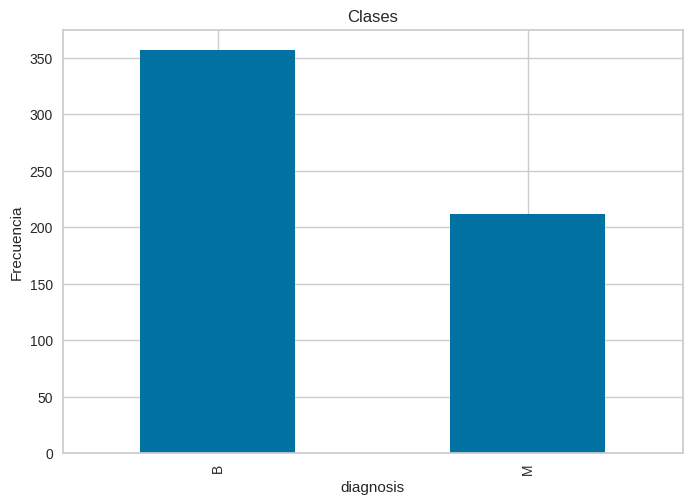

In [42]:
# Frecuencia por clase
print(df["diagnosis"].value_counts())

ax = df['diagnosis'].value_counts().plot(kind='bar')
ax.set_title('Clases')
ax.set_ylabel('Frecuencia')

In [43]:
# Cuenta de datos en las features, se puede verificar que no haya features con valores nulos
df.groupby("diagnosis").count()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357
M,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212


In [44]:
# Renombrar features con espacios en los nombres
df.rename(columns={'concave points_mean':'concave_points_mean',
                   'concave points_se':'concave_points_se',
                   'concave points_worst':'concave_points_worst'},inplace=True)

In [45]:
# Nombre de las features, conteo de cantidades, verificación de valores nulos, ver tipo de dato de cada feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [46]:
x=np.array([1,2,3]).astype('int8')

In [47]:
# Estadísticas básicas en las features
# Cuenta de datos, media, desviación estandar, valor mínimo, cuartiles, y valor máximo
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [48]:
df2

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.000000,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.000000,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.000000,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.000000,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.000000,0.677162,0.209531,0.991066,Class_1
...,...,...,...,...,...,...,...
495,0.712586,0.219776,0.510939,0.593045,0.268087,0.092055,Class_4
496,0.686058,0.224004,0.518661,0.600564,0.253298,0.093827,Class_4
497,0.698661,0.216604,0.505791,0.591165,0.241696,0.090734,Class_4
498,0.714926,0.222613,0.562420,0.587406,0.271037,0.093245,Class_4


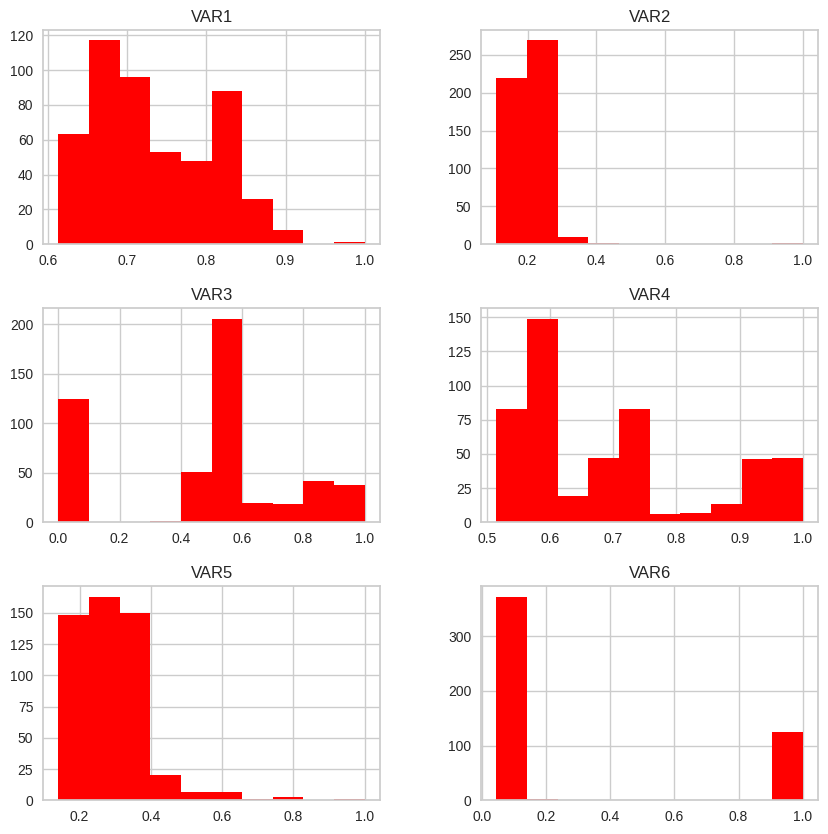

In [49]:
# Histograma de cada feature, para ver las distribuciones en cada feature y detectar alguna anómala o con pocos datos fuera de rango o incluso features nulas
df2.hist(figsize = (10,10), color='red')
plt.show()

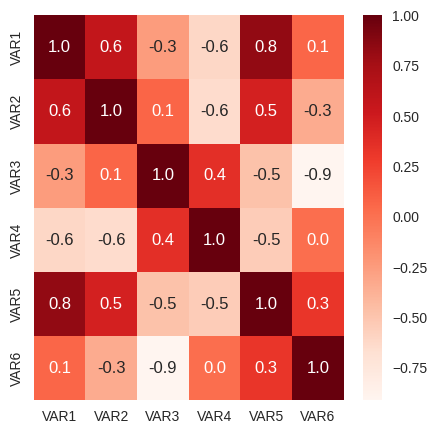

In [50]:
# Matriz de correlación
df3=df2.drop(['CLASS'], axis=1)
corr = df3.corr()

# Mapas de calor de la matriz de correlación
plt.figure(figsize=(5,5))
sns.heatmap(corr,fmt='.1f',annot=True,cmap='Reds')
plt.show()

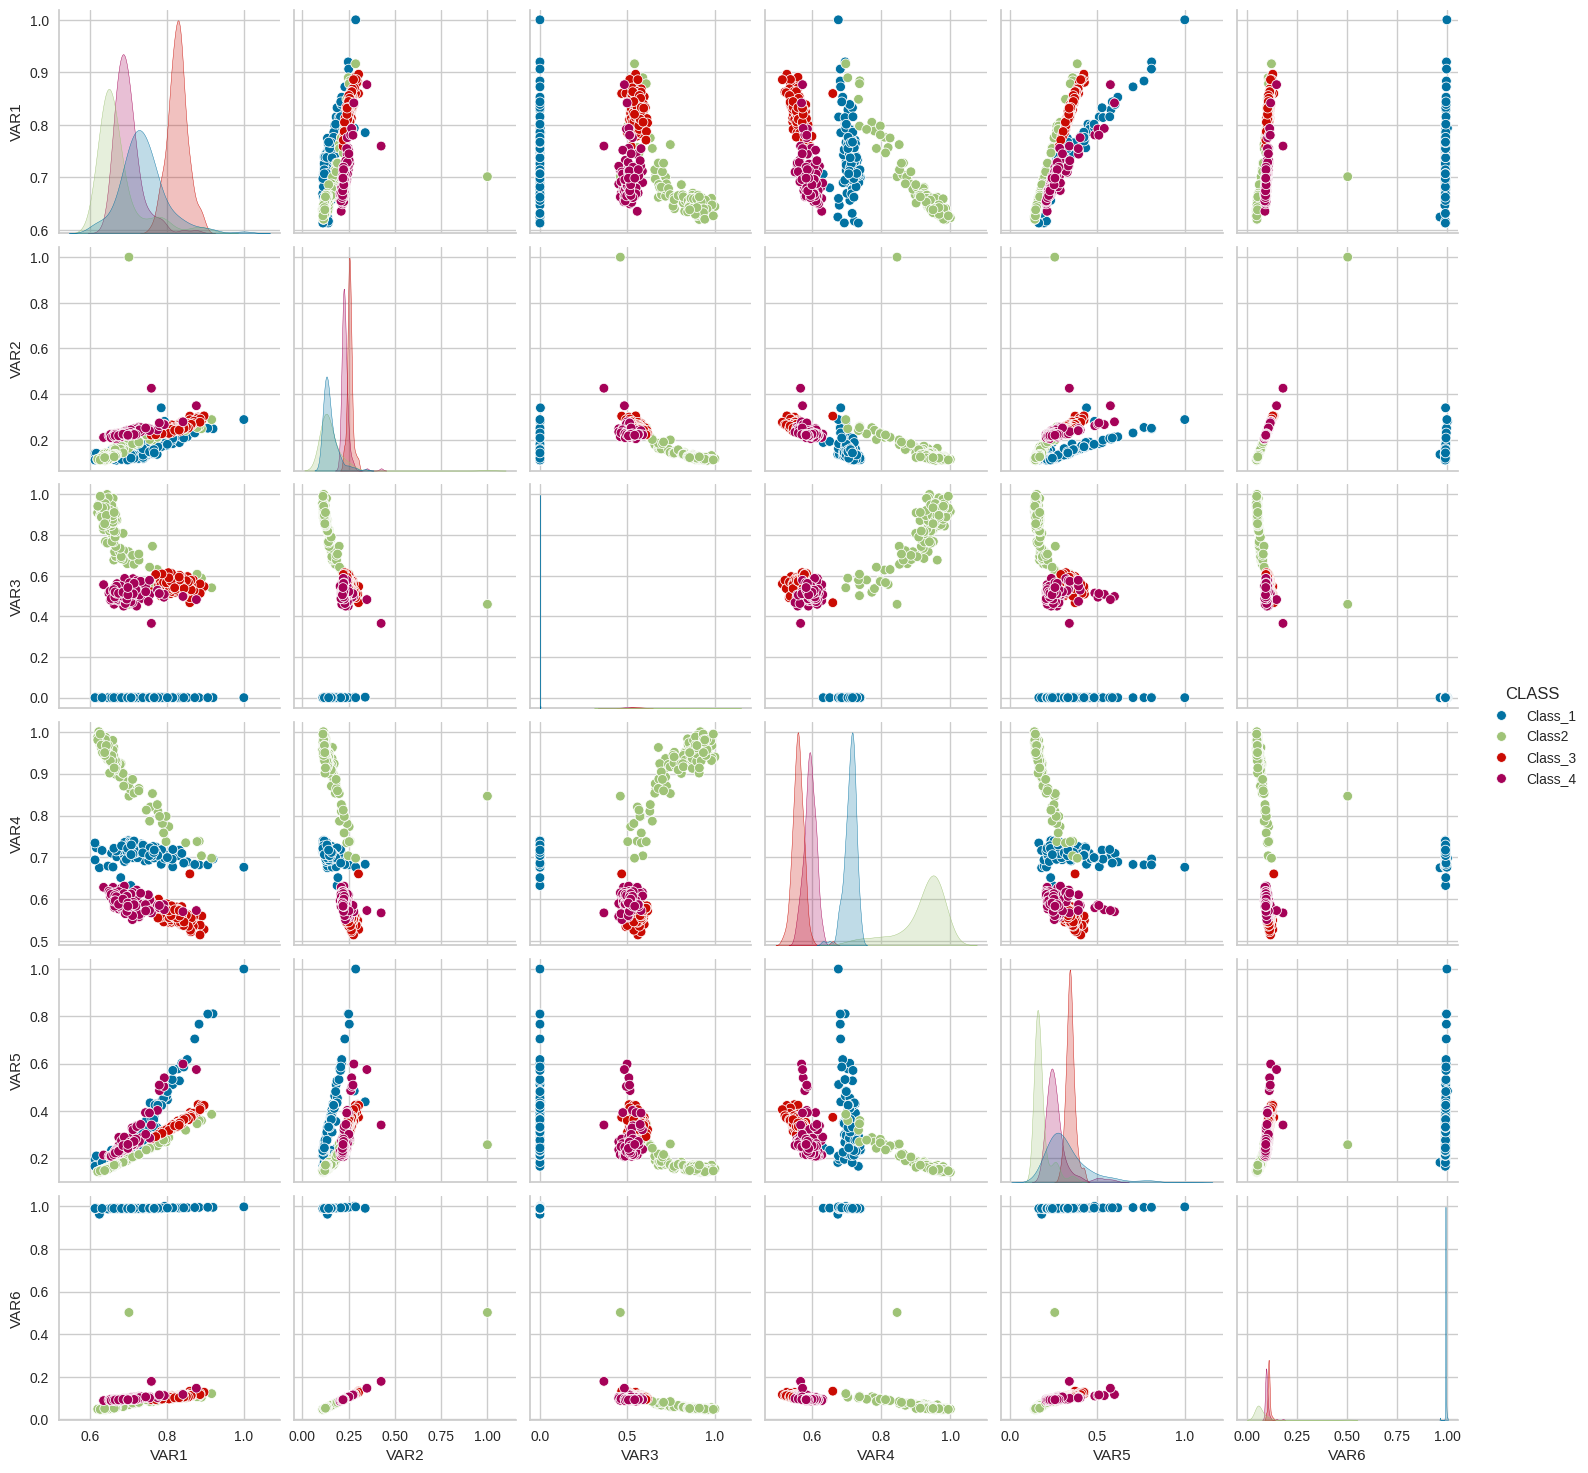

In [51]:
# Pairplot
sns.pairplot(df2, hue="CLASS")

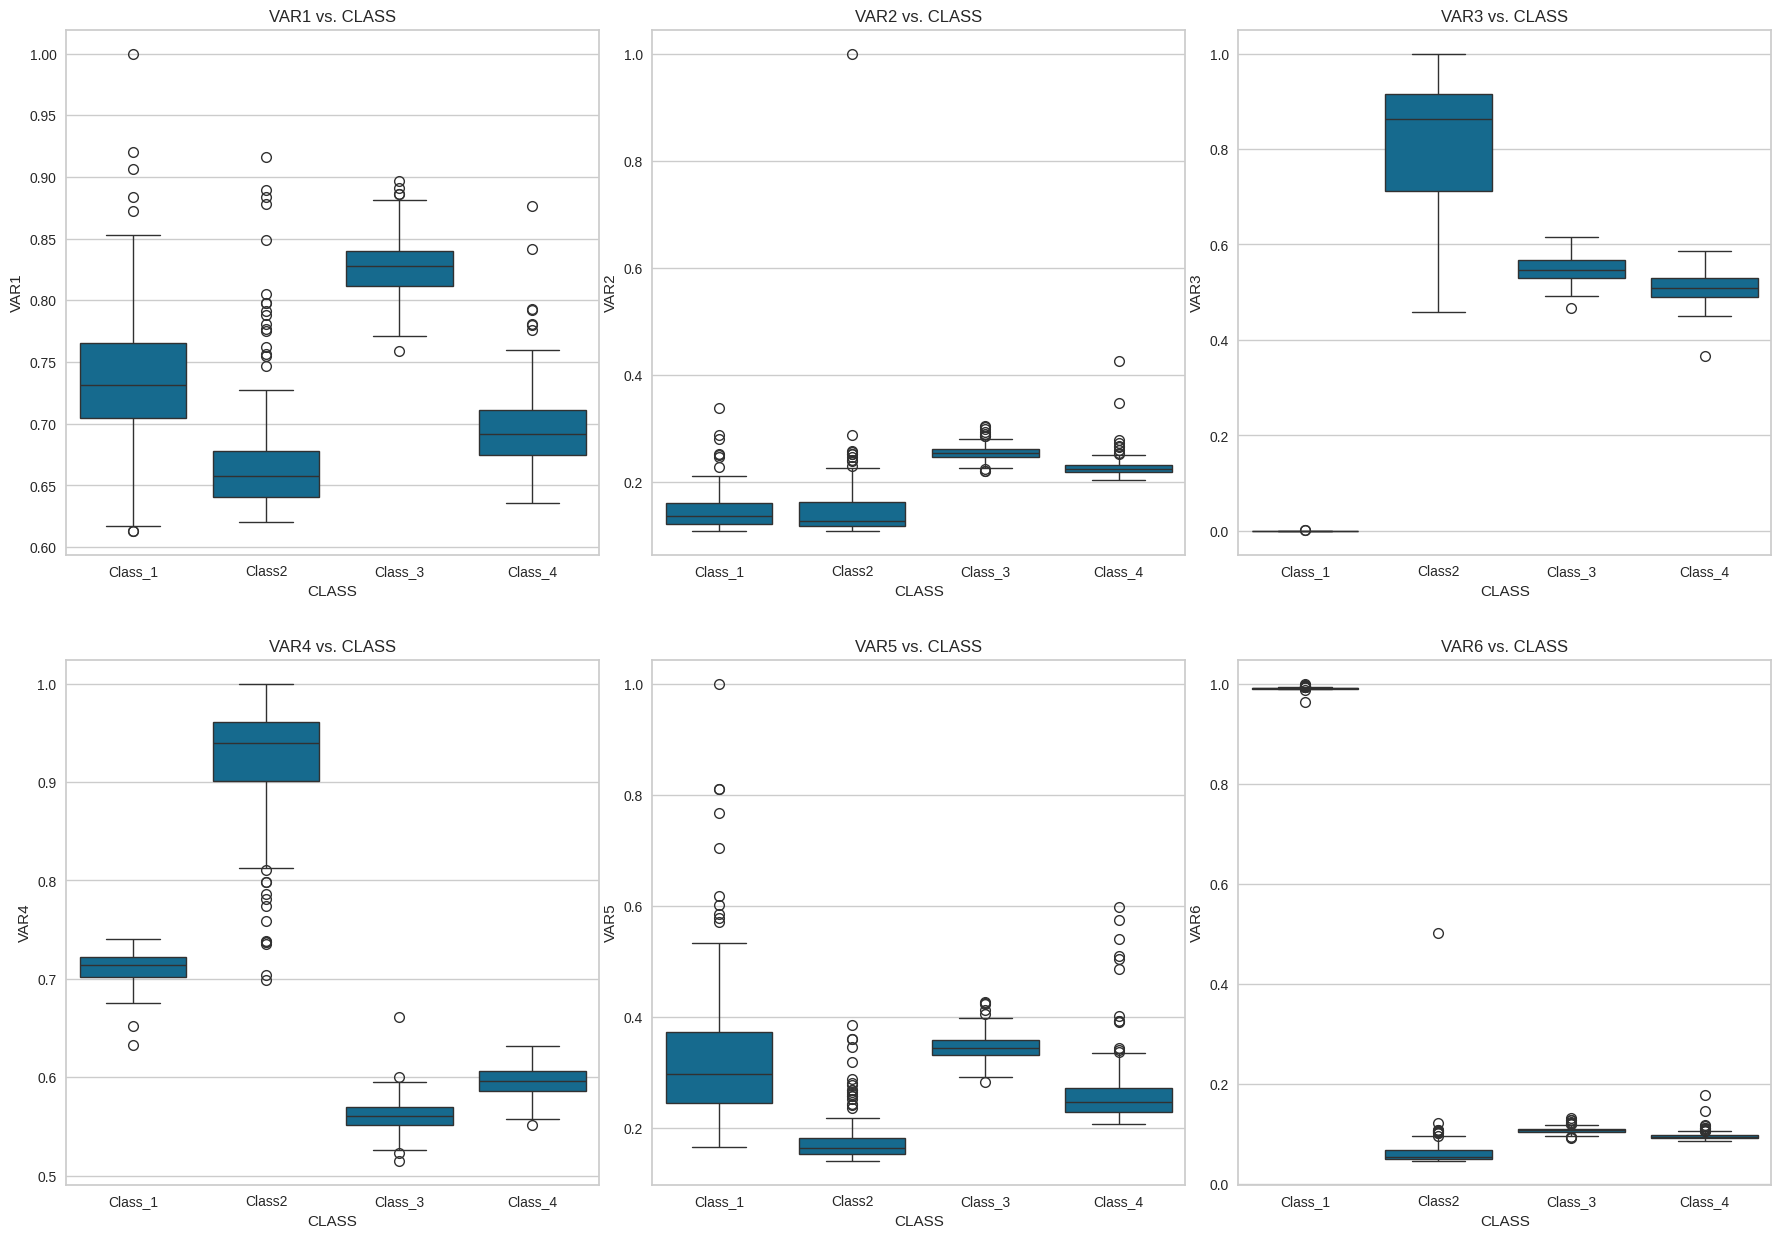

In [52]:
#plots
nrows=2
ncols=3

fig = plt.figure(figsize=(22,15))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

###############################################
i=1
ax = fig.add_subplot(nrows, ncols, i)
sns.boxplot(data=df2, x="CLASS", y="VAR1")
ax.set_xlabel("CLASS")
ax.set_ylabel("VAR1")
ax.set_title('VAR1 vs. CLASS')
###############################################
i=2
ax = fig.add_subplot(nrows, ncols, i)
sns.boxplot(data=df2, x="CLASS", y="VAR2")
ax.set_xlabel("CLASS")
ax.set_ylabel("VAR2")
ax.set_title('VAR2 vs. CLASS')
###############################################
i=3
ax = fig.add_subplot(nrows, ncols, i)
sns.boxplot(data=df2, x="CLASS", y="VAR3")
ax.set_xlabel("CLASS")
ax.set_ylabel("VAR3")
ax.set_title('VAR3 vs. CLASS')
###############################################
i=4
ax = fig.add_subplot(nrows, ncols, i)
sns.boxplot(data=df2, x="CLASS", y="VAR4")
ax.set_xlabel("CLASS")
ax.set_ylabel("VAR4")
ax.set_title('VAR4 vs. CLASS')
###############################################
i=5
ax = fig.add_subplot(nrows, ncols, i)
sns.boxplot(data=df2, x="CLASS", y="VAR5")
ax.set_xlabel("CLASS")
ax.set_ylabel("VAR5")
ax.set_title('VAR5 vs. CLASS')
###############################################
i=6
ax = fig.add_subplot(nrows, ncols, i)
sns.boxplot(data=df2, x="CLASS", y="VAR6")
ax.set_xlabel("CLASS")
ax.set_ylabel("VAR6")
ax.set_title('VAR6 vs. CLASS')
plt.show()

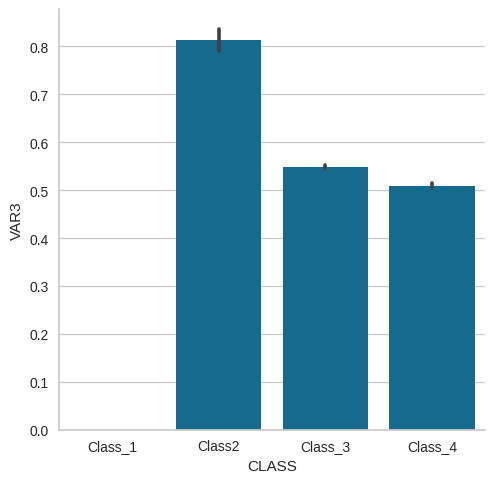

In [53]:
sns.catplot(data=df2, kind="bar", x="CLASS", y="VAR3")

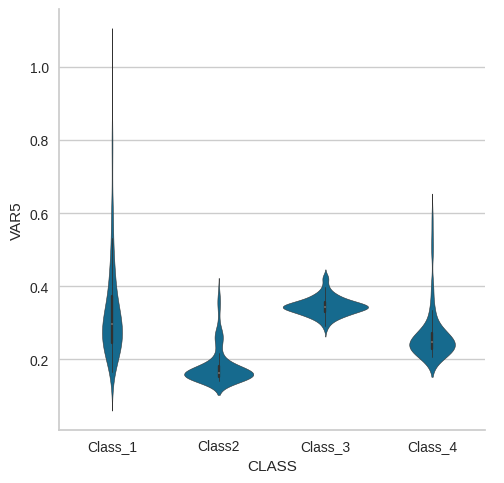

In [54]:
sns.catplot(data=df2, kind="violin", x="CLASS", y="VAR5")

# División en datos de entrenamiento y testing

In [55]:
# Obtener las features
features = df.drop(['diagnosis'], axis=1)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [56]:
# Obtener los labels
labels = df['diagnosis']
labels.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [57]:
features.shape,labels.shape

((569, 30), (569,))

In [58]:
# Separación de la data, con un 20% para testing, y 80% para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(features, labels,
                                                    test_size=0.20, random_state=1, stratify=labels)

In [59]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [60]:
# Verificacion de la cantidad de datos para entrenamiento y para testing
print("y_train labels unique:",np.unique(y_train, return_counts=True))
print("y_test labels unique: ",np.unique(y_test, return_counts=True))

y_train labels unique: (array(['B', 'M'], dtype=object), array([285, 170]))
y_test labels unique:  (array(['B', 'M'], dtype=object), array([72, 42]))


# K-Nearest Neighbors

In [61]:
# Cargamos el modelo KNN sin entrenar
model_KNN = KNeighborsClassifier(n_neighbors=3)

In [62]:
# Entrenamos el modelo KNN
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# Hacemos predicción en testing
y_pred = model_KNN.predict(X_test)

# Mostramos las predicciones
y_pred

array(['M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [64]:
y_test.to_numpy()

array(['M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M'], dtype=object)

In [65]:
# Hacemos predicción en testing para obtener las probabilidades
y_pred_proba = model_KNN.predict_proba(X_test)[:,1]

# Mostramos las predicciones
y_pred_proba.shape

(114,)

In [66]:
y_pred_proba

array([0.66666667, 0.        , 0.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 0.        , 0.66666667, 1.        , 0.        ,
       1.        , 0.        , 0.        , 0.66666667, 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 1.        ,
       1.        , 0.33333333, 0.        , 0.        , 0.        ,
       0.        , 0.66666667, 1.        , 1.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.33333333, 1.        , 0.        , 0.66666667,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 0.66666667, 0.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.     

# Métricas

In [67]:
# Matriz de confusión
confusion_matrix(y_test,y_pred)

array([[69,  3],
       [ 5, 37]])

In [68]:
# Accuracy
accuracy_s = accuracy_score(y_test,y_pred)
print('accuracy_score: {0:.4f}'.format(accuracy_s))

accuracy_score: 0.9298


In [69]:
# Precision
precision_s = precision_score(y_test,y_pred,pos_label="B")
print('precision_score: {0:.4f}'.format(precision_s))

precision_score: 0.9324


In [70]:
# Recall
recall_s = recall_score(y_test,y_pred,pos_label="B")
print('recall_score: {0:.4f}'.format(recall_s))

recall_score: 0.9583


In [71]:
# F1-score
f1_s = f1_score(y_test,y_pred,pos_label="B")
print('f1_score: {0:.4f}'.format(f1_s))

f1_score: 0.9452


In [72]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           B       0.93      0.96      0.95        72
           M       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [73]:
# Area Under the ROC Curve
roc_s = roc_auc_score(y_test, y_pred_proba)
print('ROC_AUC: {0:.4f}'.format(roc_s))

ROC_AUC: 0.9487


In [ ]:
# Validación cruzada

## Se define el modelo de ML
model_KNN = KNeighborsClassifier(n_neighbors=3)

## Se establece la cantidad de folds
kfold = model_selection.KFold(n_splits=10, shuffle = True, random_state=0)

## Se hace la validación cruzada
cv_results = np.array(model_selection.cross_val_score(model_KNN, features, labels, cv=kfold, scoring='accuracy', n_jobs=-1))

## kfold accuracies
print(cv_results,"\n")

## Media y desviación estandar con la valicación cruzada
print(cv_results.mean(),cv_results.std())

[0.87719298 0.94736842 0.96491228 0.96491228 0.87719298 0.87719298
 0.92982456 0.87719298 0.98245614 0.92857143] 

0.9226817042606517 0.04013958753552488


# Métricas bonitas

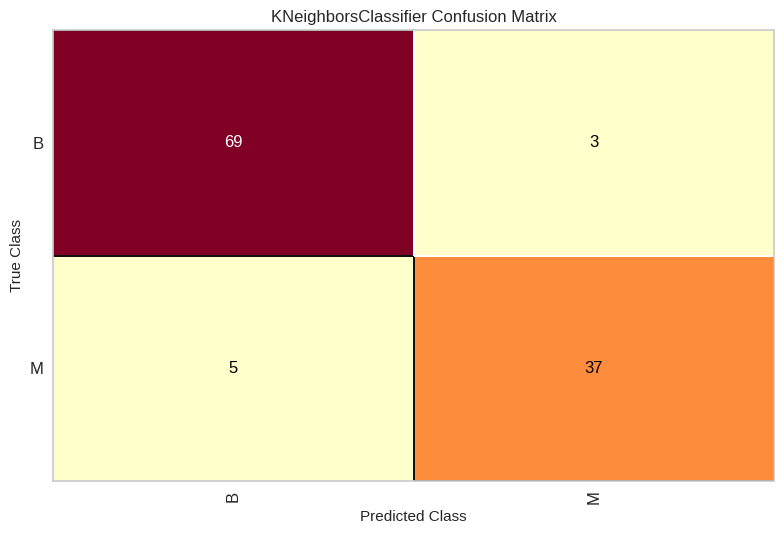

In [74]:
# Matriz de confusión
model = KNeighborsClassifier(n_neighbors=3)
visualizer_cm = cm(model, X_train, y_train, X_test, y_test)

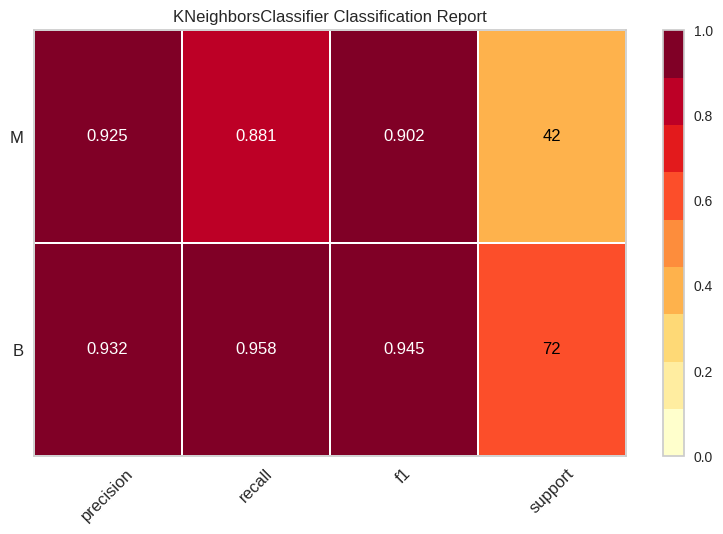

In [75]:
le = LabelEncoder()
le.fit(list(np.unique(np.array(y_train)))) #['B', 'M']
y_train_coded = le.transform(y_train)
y_test_coded = le.transform(y_test)

# Reporte de clasificación
model = KNeighborsClassifier(n_neighbors=3)
visualizer_cr = cr(model, X_train, y_train_coded, X_test, y_test_coded, classes=list(np.unique(np.array(y_train))), support=True)


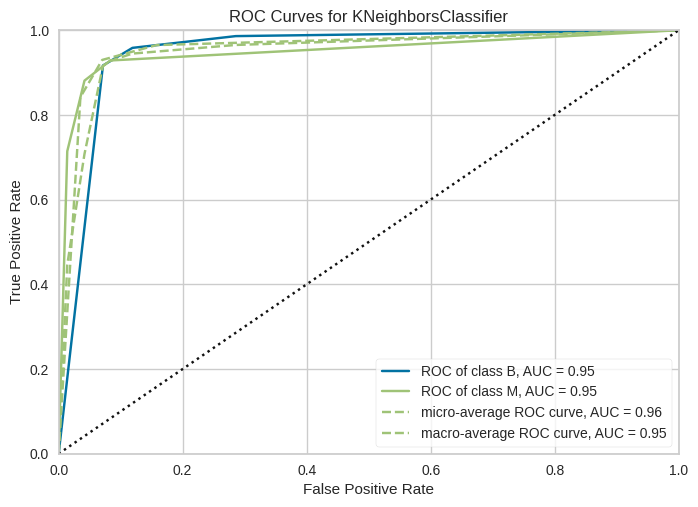

In [76]:
## Conversión de etiquetas categóricas a numéricas
le = LabelEncoder()
le.fit(list(np.unique(np.array(y_train)))) #['B', 'M']
y_train_coded = le.transform(y_train)
y_test_coded = le.transform(y_test)

# Curvas ROC
model = KNeighborsClassifier(n_neighbors=3)
visualizer_roc = roc_auc(model, X_train, y_train_coded, X_test=X_test, y_test=y_test_coded, classes=['B', 'M'])

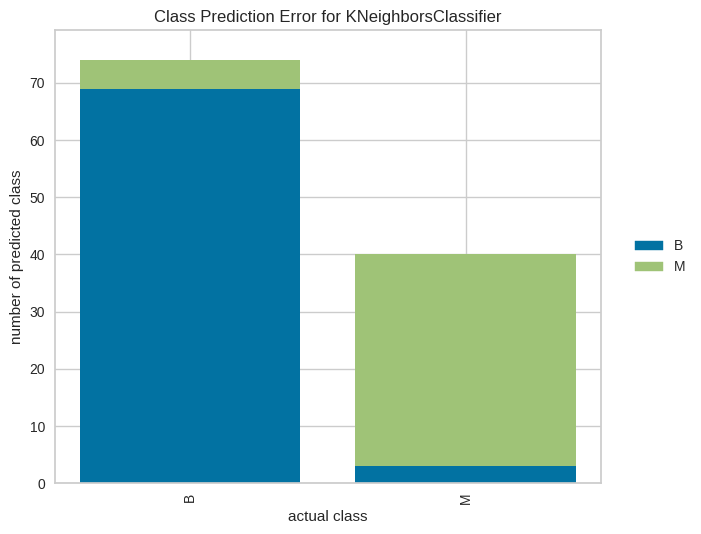

In [77]:
# Error de predicción por clase
model = KNeighborsClassifier(n_neighbors=3)
visualizer_pe = class_prediction_error(model,X_train, y_train, X_test, y_test)

# KNN con preprocesamiento de las features

## Data sin preprocesamiento de features

In [79]:
# Cargamos el modelo KNN sin entrenar
model_KNN = KNeighborsClassifier(n_neighbors=3)
# Entrenamos el modelo KNN
model_KNN.fit(X_train, y_train)
# Obtenemos la métrica lograda
model_KNN.score(X_test, y_test)

0.9298245614035088

## Preprocesando con el StandardScaler

In [81]:
#https://scikit-learn.org/stable/modules/preprocessing.html#normalization

# Definir preprocesamiento
standard_scaler = preprocessing.StandardScaler()
# Preprocesar los datos
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

x_original=standard_scaler.inverse_transform(X_test_standard)

In [82]:
X_test_standard[0,0]

-0.10126858569583214

In [83]:
X_test[0:1].to_numpy()[0,0]

13.77

In [ ]:
x_original[0,0]

13.77

In [84]:
X_train_standard[0:1]

array([[-0.3468142 , -0.68320253, -0.39135935, -0.39601345, -1.21880157,
        -0.95936753, -0.63068292, -0.6511651 ,  0.07014887, -0.88740847,
        -0.79321336, -0.52755584, -0.70947006, -0.58156766, -0.58579823,
        -0.53489871, -0.29026217, -0.54865802, -0.22979426, -0.60133089,
        -0.49644661, -0.57905888, -0.49169317, -0.49281762, -1.00667696,
        -0.66615628, -0.46751232, -0.49674463,  0.19814638, -0.8104268 ]])

In [85]:
X_train[0:1].to_numpy()

array([[1.291e+01, 1.633e+01, 8.253e+01, 5.164e+02, 7.941e-02, 5.366e-02,
        3.873e-02, 2.377e-02, 1.829e-01, 5.667e-02, 1.942e-01, 9.086e-01,
        1.493e+00, 1.575e+01, 5.298e-03, 1.587e-02, 2.321e-02, 8.420e-03,
        1.853e-02, 2.152e-03, 1.388e+01, 2.200e+01, 9.081e+01, 6.006e+02,
        1.097e-01, 1.506e-01, 1.764e-01, 8.235e-02, 3.024e-01, 6.949e-02]])

In [86]:
# Cargamos el modelo KNN sin entrenar
model_KNN = KNeighborsClassifier(n_neighbors=3)
# Entrenamos el modelo KNN
model_KNN.fit(X_train_standard, y_train)
# Obtenemos la métrica lograda
model_KNN.score(X_test_standard, y_test)

0.9649122807017544

## Preprocesando con MinMaxScaler

In [92]:
# Definir preprocesamiento
min_max_scaler = preprocessing.MinMaxScaler()
# Preprocesar los datos
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [88]:
# Cargamos el modelo KNN sin entrenar
model_KNN = KNeighborsClassifier(n_neighbors=3)
# Entrenamos el modelo KNN
model_KNN.fit(X_train_minmax, y_train)
# Obtenemos la métrica lograda
model_KNN.score(X_test_minmax, y_test)

0.9385964912280702

# Balance de clases

In [93]:
# Balance de clases hacia la clase mayor
sampler = RandomOverSampler(random_state=1)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

print("y_test  original: ",np.unique(y_test, return_counts=True))
print("y_train original: ",np.unique(y_train, return_counts=True))
print("y_train balanced: ",np.unique(y_train_balanced, return_counts=True))

y_test  original:  (array(['B', 'M'], dtype=object), array([72, 42]))
y_train original:  (array(['B', 'M'], dtype=object), array([285, 170]))
y_train balanced:  (array(['B', 'M'], dtype=object), array([285, 285]))


In [ ]:
# Balance de clases hacia la clase mayor
sampler = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

print("y_test  original: ",np.unique(y_test, return_counts=True))
print("y_train original: ",np.unique(y_train, return_counts=True))
print("y_train balanced: ",np.unique(y_train_balanced, return_counts=True))

y_test  original:  (array(['B', 'M'], dtype=object), array([72, 42]))
y_train original:  (array(['B', 'M'], dtype=object), array([285, 170]))
y_train balanced:  (array(['B', 'M'], dtype=object), array([285, 285]))


In [ ]:
# Balance de clases hacia la clase mayor
sampler = ADASYN(random_state=1)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

print("y_test  original: ",np.unique(y_test, return_counts=True))
print("y_train original: ",np.unique(y_train, return_counts=True))
print("y_train balanced: ",np.unique(y_train_balanced, return_counts=True))

y_test  original:  (array(['B', 'M'], dtype=object), array([72, 42]))
y_train original:  (array(['B', 'M'], dtype=object), array([285, 170]))
y_train balanced:  (array(['B', 'M'], dtype=object), array([285, 293]))


In [94]:
# Balance de clases hacia la clase mayor
sampler = BorderlineSMOTE(random_state=1)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

print("y_test  original: ",np.unique(y_test, return_counts=True))
print("y_train original: ",np.unique(y_train, return_counts=True))
print("y_train balanced: ",np.unique(y_train_balanced, return_counts=True))

y_test  original:  (array(['B', 'M'], dtype=object), array([72, 42]))
y_train original:  (array(['B', 'M'], dtype=object), array([285, 170]))
y_train balanced:  (array(['B', 'M'], dtype=object), array([285, 285]))


In [95]:
# Balance de clases hacia la clase mayor
sampler = KMeansSMOTE(random_state=1)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

print("y_test  original: ",np.unique(y_test, return_counts=True))
print("y_train original: ",np.unique(y_train, return_counts=True))
print("y_train balanced: ",np.unique(y_train_balanced, return_counts=True))

y_test  original:  (array(['B', 'M'], dtype=object), array([72, 42]))
y_train original:  (array(['B', 'M'], dtype=object), array([285, 170]))
y_train balanced:  (array(['B', 'M'], dtype=object), array([285, 290]))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [96]:
# Balance de clases hacia la clase mayor
sampler = SVMSMOTE(random_state=1)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

print("y_test  original: ",np.unique(y_test, return_counts=True))
print("y_train original: ",np.unique(y_train, return_counts=True))
print("y_train balanced: ",np.unique(y_train_balanced, return_counts=True))

y_test  original:  (array(['B', 'M'], dtype=object), array([72, 42]))
y_train original:  (array(['B', 'M'], dtype=object), array([285, 170]))
y_train balanced:  (array(['B', 'M'], dtype=object), array([285, 285]))


In [97]:
# Balance de clases hacia la clase mayor
sampler = SMOTEN(random_state=1)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

print("y_test  original: ",np.unique(y_test, return_counts=True))
print("y_train original: ",np.unique(y_train, return_counts=True))
print("y_train balanced: ",np.unique(y_train_balanced, return_counts=True))

y_test  original:  (array(['B', 'M'], dtype=object), array([72, 42]))
y_train original:  (array(['B', 'M'], dtype=object), array([285, 170]))
y_train balanced:  (array(['B', 'M'], dtype=object), array([285, 285]))


In [98]:
# Balance de clases hacia la clase menor
sampler = RandomUnderSampler(random_state=1)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

print("y_test  original: ",np.unique(y_test, return_counts=True))
print("y_train original: ",np.unique(y_train, return_counts=True))
print("y_train balanced: ",np.unique(y_train_balanced, return_counts=True))

y_test  original:  (array(['B', 'M'], dtype=object), array([72, 42]))
y_train original:  (array(['B', 'M'], dtype=object), array([285, 170]))
y_train balanced:  (array(['B', 'M'], dtype=object), array([170, 170]))


In [99]:
# Balance de clases hacia la clase menor
sampler = ClusterCentroids(random_state=1)
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

print("y_test  original: ",np.unique(y_test, return_counts=True))
print("y_train original: ",np.unique(y_train, return_counts=True))
print("y_train balanced: ",np.unique(y_train_balanced, return_counts=True))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


y_test  original:  (array(['B', 'M'], dtype=object), array([72, 42]))
y_train original:  (array(['B', 'M'], dtype=object), array([285, 170]))
y_train balanced:  (array(['B', 'M'], dtype=object), array([170, 170]))


In [100]:
# Balance de clases hacia la clase menor
sampler = NearMiss()
X_train_balanced, y_train_balanced = sampler.fit_resample(X_train, y_train)

print("y_test  original: ",np.unique(y_test, return_counts=True))
print("y_train original: ",np.unique(y_train, return_counts=True))
print("y_train balanced: ",np.unique(y_train_balanced, return_counts=True))

y_test  original:  (array(['B', 'M'], dtype=object), array([72, 42]))
y_train original:  (array(['B', 'M'], dtype=object), array([285, 170]))
y_train balanced:  (array(['B', 'M'], dtype=object), array([170, 170]))


# Reducción de dimensionalidad

In [101]:
# Obtener las features
#features = df2.drop(['CLASS'], axis=1)
features = df.drop(['diagnosis'], axis=1)
features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
# Hacer escalamiento a los datos
scalar = preprocessing.StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(features))
scaled_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,0.071025,2.379583,2.604187,1.086384,0.191805,0.666001,2.067178,-1.138416,0.167980,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [118]:
pca = PCA()
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0.262955,-0.859014,0.103388,-0.690804,-0.601793,0.745116,-0.265471,-0.549563,-0.133768,0.345565,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0.813120,0.157923,-0.943529,-0.653475,0.008975,-0.648809,-0.017212,0.318297,0.247565,-0.114133,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,-0.605604,0.124387,-0.410627,0.016680,0.483420,0.325111,0.190918,-0.087975,0.392626,-0.204532,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,-1.151514,1.011316,-0.933271,-0.487417,-0.168848,0.051370,0.482634,-0.035875,0.026748,-0.464734,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0.651360,-0.110515,0.387948,-0.539181,0.310319,-0.152606,0.133142,-0.018714,-0.461436,0.065495,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214


In [122]:
# Hacer PCA para obtener una cantidad indicada de componentes principales
pca = PCA(n_components = 3)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3'])
data_pca.head()

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123167
1,2.387802,-3.768172,-0.529289
2,5.733896,-1.075174,-0.551745
3,7.122953,10.275589,-3.232784
4,3.935302,-1.948072,1.389764


<Axes: >

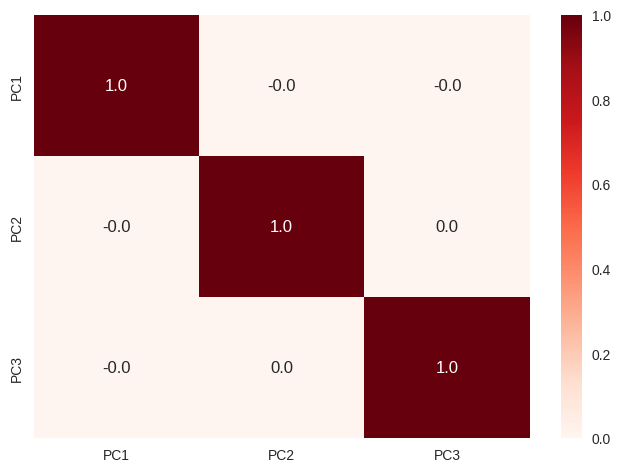

In [106]:
# Mapa de calor de la matriz de correlaciones de las componentes
sns.heatmap(data_pca.corr(),fmt='.1f',annot=True,cmap='Reds')

In [139]:
# Aplicandolo a la data para entrenar algoritmos y hacer testing
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [140]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [141]:
X_train_pca.shape, X_test_pca.shape

((455, 3), (114, 3))

In [142]:
model=KNeighborsClassifier()

In [143]:
model.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [144]:
model.score(X_test_pca,y_test)

0.9298245614035088

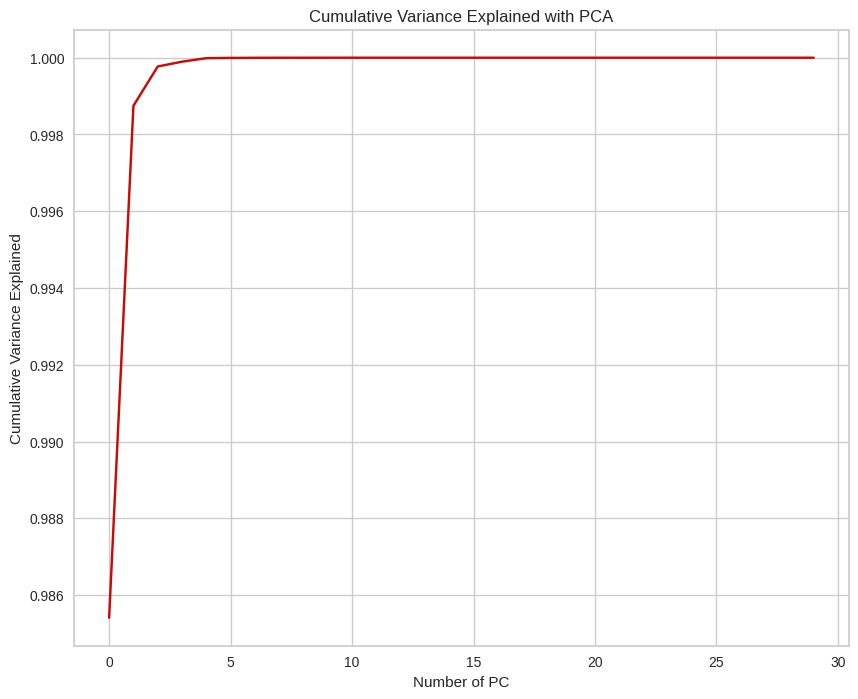

In [145]:
# PCA con varianza acumulada
pca = PCA()
pca.fit(X_train)
data_pca = pca.transform(X_train)
data_pca = pd.DataFrame(X_train)
data_pca.head()

# Plot the cumulative variance explained

plt.figure(figsize = (10, 8))
plt.plot(list(range(X_train.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Number of PC'); plt.ylabel('Cumulative Variance Explained');
plt.title('Cumulative Variance Explained with PCA');

In [148]:
pca = PCA(n_components=0.8)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [149]:
X_train_pca.shape,X_test_pca.shape

((455, 1), (114, 1))